
## Quaternions

In the following exercise you'll implement functions to convert between Euler angles and quaternion representations. It's useful to be able to easily navigate back and forth between these representations because of their relative strengths. Quaternions are better for calculations, while Euler angles are far more intuitive.

Some messages coming from your drone in simulation (or in the real world) will represent orientation data as a quaternion, while others use Euler angles. So it's a good idea to be able to seamlessly handle both.

## From a quaternion to a rotation Matrix

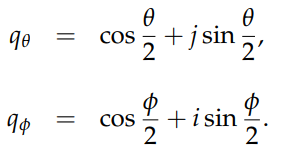

## From a matrix of angles to a quaternion
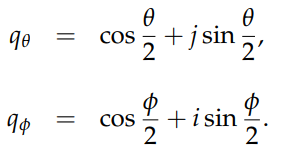
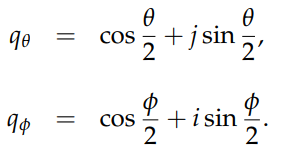

## From Euler angles to a quaternion
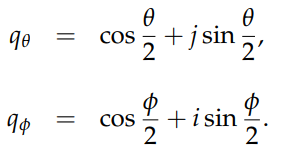
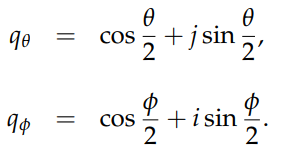

In [12]:
import numpy as np
import math as mt

#-----------------------------------------------------------------------------------------------
def quaternion_multiply(quaternion1, quaternion0):
    w0, x0, y0, z0 = quaternion0
    w1, x1, y1, z1 = quaternion1
    return np.array([-x1 * x0 - y1 * y0 - z1 * z0 + w1 * w0,
                     x1 * w0 + y1 * z0 - z1 * y0 + w1 * x0,
                     -x1 * z0 + y1 * w0 + z1 * x0 + w1 * y0,
                     x1 * y0 - y1 * x0 + z1 * w0 + w1 * z0])

def rot_yaw_to_quat(psi):
    cos=mt.cos(psi/2)
    sin=mt.sin(psi/2)
    return np.array([cos,0,0,sin])

def rot_pitch_to_quat(theta):
    cos=mt.cos(theta/2)
    sin=mt.sin(theta/2)
    return np.array([cos,0,sin,0])

def rot_roll_to_quat(phi):    
    cos=mt.cos(phi/2)
    sin=mt.sin(phi/2)
    return np.array([cos,sin,0,0])
#---------------------------------------------------------------------------------------------------

def euler_to_quaternion(angles):
    roll = angles[0]
    pitch = angles[1]
    yaw = angles[2]

    q_yaw = rot_yaw_to_quat(yaw)
    q_pitch = rot_pitch_to_quat(pitch)
    q_roll = rot_roll_to_quat(roll)
    return quaternion_multiply(q_yaw, quaternion_multiply(q_pitch, q_roll))

def quaternion_to_euler(quaternion):
    a = quaternion[0]
    b = quaternion[1]
    c = quaternion[2]
    d = quaternion[3]

    return np.array([ mt.atan2(2*(a*b+c*d),1-2*(b**2 + c**2)),
                     mt.asin(2*(a*c-d*b)),
                     mt.atan2(2*(a*d+b*c),1-2*(c**2+d**2))])

Test the conversion.

In [18]:
#Escribimos los ángulos de Euler
an1=np.deg2rad(90)
an2=np.deg2rad(30)
an3=np.deg2rad(0)

print("Los ángulos de Euler en radianes son:")
euler = np.array([an1,an2,an3])
print(euler)

#Convertimos los ángulos antes dados a forma de cuaternion
print("La conversión de Euler a cuaternion es:")
q = euler_to_quaternion(euler) # should be [ 0.683  0.683  0.183 -0.183]
print(q)

#Hacemos el proceso inverso de conversión de cuaternion a ángulos de Euler, nos tiene que entregar el ángulo original escrito
print("La conversión de Cuaternion a Euler es:")
e = quaternion_to_euler(q)
print(e)

Los ángulos de Euler en radianes son:
[1.57079633 0.52359878 0.        ]
La conversión de Euler a cuaternion es:
[ 0.6830127  0.6830127  0.1830127 -0.1830127]
La conversión de Cuaternion a Euler es:
[1.57079633 0.52359878 0.        ]
